In [0]:
from sklearn.datasets import fetch_openml

In [0]:
mnist = fetch_openml('mnist_784')

In [0]:
## ectracting data
X,y = mnist['data'],mnist['target']

In [0]:
import matplotlib.pyplot as plt

In [5]:
print (X.shape)
print (y.shape)

(70000, 784)
(70000,)


5


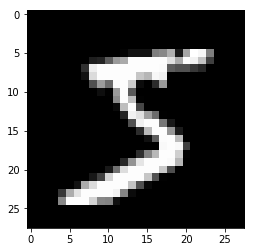

In [6]:
plt.gray()
plt.imshow(X[0].reshape(28,28))
print (y[0])

In [0]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(X,y)

x_train,x_test,y_train,y_test = X[:6000],X[6000:],y[:6000],y[6000:]


In [0]:
# shuffle the data
import numpy as np

suffle_index = np.random.permutation(6000)
x_train,y_train=x_train[suffle_index],y_train[suffle_index]

In [0]:
## testing a  binary classifier
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

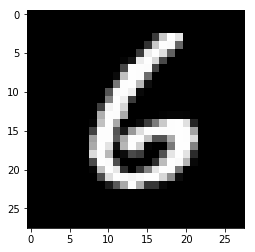

In [11]:
pred=(sgd_clf.predict(x_test))
plt.imshow(x_test[0].reshape(28,28))

In [0]:
##measuring accuracy with cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [13]:
## fold it to three
skfolds = StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(x_train,y_train):
  ## skfolds split the trin and test index
  
  ## split the train data even more
  clone_clf = clone(sgd_clf)
  x_train_folds = x_train[train_index]
  y_train_folds = (y_train[train_index])  
  x_test_folds = x_train[test_index]  
  y_test_folds = (y_train[test_index])
  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred=clone_clf.predict(x_test_folds)
  correct_ans = sum(y_pred==y_test_folds)
  print('Percentage accuracy: '+str(float(correct_ans/len(y_pred))))

Percentage accuracy: 0.8587824351297405
Percentage accuracy: 0.8735632183908046
Percentage accuracy: 0.8776942355889724


In [0]:
## do it with the corss val score
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(sgd_clf,x_train,y_train,cv=10,scoring='accuracy')

array([0.8583196 , 0.86710963, 0.84858569, 0.83166667, 0.88814691,
       0.84474124, 0.86143573, 0.87312187, 0.89447236, 0.88107203])

In [0]:
## maing the confusion matrix
from sklearn.metrics import confusion_matrix

In [0]:
cm=confusion_matrix(y_test,pred)

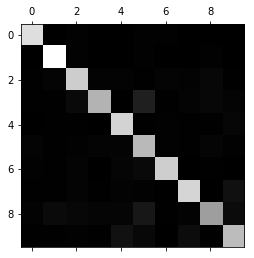

In [18]:
plt.matshow(cm,cmap=plt.cm.gray)

In [0]:
### find the precission and recall
# precision 
from sklearn.metrics import precision_score,recall_score,roc_curve,f1_score

In [20]:
print(precision_score(y_test,pred,average='macro'))
print(recall_score(y_test,pred,average='macro'))
print(f1_score(y_test,pred,average='macro'))

sgd_clf.fit(x_train,y_train)


0.8604889349494689
0.857416540493946
0.8559324075394062


In [0]:
## see the result after normalizting
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)

In [24]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train_scaler,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

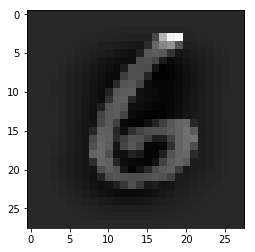

In [25]:
pred=(sgd_clf.predict(x_test_scaler))
plt.imshow(x_test_scaler[0].reshape(28,28))

In [26]:
## fold it to three
skfolds = StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(x_train_scaler,y_train):
  ## skfolds split the trin and test index
  
  ## split the train data even more
  clone_clf = clone(sgd_clf)
  x_train_folds = x_train_scaler[train_index]
  y_train_folds = (y_train[train_index])  
  x_test_folds = x_train_scaler[test_index]  
  y_test_folds = (y_train[test_index])
  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred=clone_clf.predict(x_test_folds)
  correct_ans = sum(y_pred==y_test_folds)
  print('Percentage accuracy: '+str(float(correct_ans/len(y_pred))))

Percentage accuracy: 0.8862275449101796
Percentage accuracy: 0.887056471764118
Percentage accuracy: 0.8952380952380953


In [27]:
cross_val_score(sgd_clf,x_train_scaler,y_train,cv=10,scoring='accuracy')

array([0.88797364, 0.89202658, 0.90016639, 0.87666667, 0.9048414 ,
       0.88981636, 0.87312187, 0.90317195, 0.91289782, 0.90619765])

In [0]:
cm=confusion_matrix(y_test,pred)

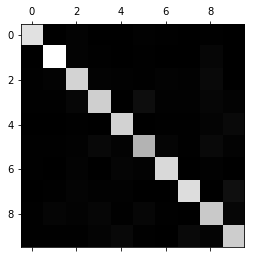

In [29]:
plt.matshow(cm,cmap=plt.cm.gray)

In [0]:
## learning curve to see the result are actually converge
from sklearn.metrics import mean_squared_error

In [0]:
from sklearn.model_selection import train_test_split
def plot_learning_curve(model,x,y):
  x_train,x_test,y_train,y_test = train_test_split(x,y)
  train_error,test_error=[],[] ## empty list
  ## this model willl append data and then test so in the starting it will be bad cause 
  # less data but we test the test model same ammount of data
  for m in range(1,len(x_train)):
    model.fit(x_train[:m],y_train[:m])
    y_train_predict=model.predict(x_train[:m])
    y_test_predict=model.predict(x_test)
    train_error.append(mean_squared_error(y_train_predict,y_train[:m]))
    test_error.append(mean_squared_error(y_test_predict,y_test))
  plt.plot(np.sqrt(train_error),'r-+')
  plt.plot(np.sqrt(test_error),'r-+')  

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()

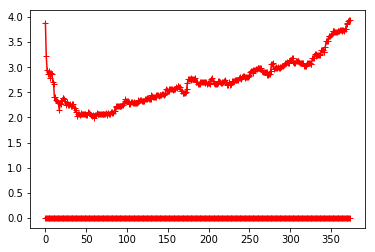

In [55]:
plot_learning_curve(lr,x_test[:500],y_test[:500])

In [0]:
## if the data is more the result will bve better